###HW 2 VISIONS & PERCEPTION - Santilli Sofia 1813509 ###

In [ ]:
import numpy as np
import sympy
from sympy import *
from IPython.display import display, Math
from PIL import Image
from skimage.transform import warp
from scipy.interpolate import  griddata

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pathFolder = '/content/drive/MyDrive/ColabNotebooks/VISIONS & PERSPECTIVE/hw2_Pirri'

In [ ]:
import matplotlib.pyplot as plt

def plotPoint(p):
    plt.scatter(p[0], p[1],c='red',s=50)

def plotSegment(p1, p2):
    plt.plot([p1[0],p2[0]],[p1[1], p2[1]], c='blue')


#EXERCISE 1#

###POINT 1###
Construct three collinear points x1, x2 and x3 and show they are on a line.

I choose two points in the space, p1 and p2, and compute the line that passes through both of them:

In [ ]:
p1 = Matrix(3, 1, [-3, 0, 1]) #3 rows, 1 col
p2 = Matrix(3, 1, [-2, 1, 0])
print("I take two random points: ")
display(Math("p1 = " + latex(p1) + ",   p2 = " + latex(p2)))


#line that passes through both the points
line = p1.cross(p2)
#print(line)

x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')

#only to visualize the expression of the line
x = Matrix(1, 3, [x1, x2, x3])
vis_line = x* line

print("\nand I compute the expression of the line l that passes though both of them: ")
display(Math(latex(vis_line)))

I take two random points: 


<IPython.core.display.Math object>


and I compute the expression of the line l that passes though both of them: 


<IPython.core.display.Math object>

I choose two values for the third point, and I obtain the third value equaling the expression of the line (with x2 and x3 substituted) to 0.

In [ ]:
#I initialize p3 with 3 coordinated chosen by me. The third coordinate has to be computed such that p3 lies on the line l
p3 = Matrix(3, 1, [x1, 0, 2])

eq_for_3coord = np.transpose(p3)*line
print("Equation to solve in order to find the unknown coordinate of p3: ")
display(Math(latex(eq_for_3coord) + " = 0"))

thirdcoord = solve(eq_for_3coord, x1)[x1]

p3[0] = thirdcoord
print("So we computed the third point: ")
display(Math("p3 = " + latex(p3)))


print("For contruction, p3 has to lie on the line l. \n\nWe verified through the dot product that the three points are collinear (all lie on line l): ")

verify_p1 = np.dot(transpose(p1), line)
if (verify_p1==0):
  print("p1 lies on line l")
else:
  print("p1 doesn't lie on line l")

verify_p2 = np.dot(transpose(p2), line)
if (verify_p2==0):
  print("p2 lies on line l")
else:
  print("p2 doesn't lie on line l")

verify_p3 = np.dot(transpose(p3), line)
if (verify_p3==0):
  print("p3 lies on line l")
else:
  print("p3 doesn't lie on line l")

if(verify_p1==0 and verify_p2==0 and verify_p3==0):
  print("SUCCESSFULLY BUILT 3 COLLINEAR POINTS!!!")
else:
  print("NOT SUCCESSFULLY BUILT 3 COLLINEAR POINTS")

Equation to solve in order to find the unknown coordinate of p3: 


<IPython.core.display.Math object>

So we computed the third point: 


<IPython.core.display.Math object>

For contruction, p3 has to lie on the line l. 

We verified through the dot product that the three points are collinear (all lie on line l): 
p1 lies on line l
p2 lies on line l
p3 lies on line l
SUCCESSFULLY BUILT 3 COLLINEAR POINTS!!!



###POINT 2### 
Show that if H is a projective point trasformation, then the transformation applied to the points x1, x2 and x3 and suitably to the line l maps the points into points x1', x2', x3'and the line into the line l'such that x1', x2' and x3' are on the line l'.

I define a matrix H and I verify that it is non singular

In [ ]:
#H = Matrix(3, 3, [h1, h2, h3, h4, h5, h6, h7, h8, h9])
H = Matrix(3, 3, [1, 0, 1, 0, 1, 1, 1, 1, 0])
display(Math("H = " + latex(H)))

#check if H is singular
H_det = H.det()
#sing = np.linalg.det(H)
print("determinant of H = ", H_det)
if(H_det != 0):
  print("H is non singular --> can be a projective point transformation")

<IPython.core.display.Math object>

determinant of H =  -2
H is non singular --> can be a projective point transformation


I multiply H for each point p_i and I obtain the cprrespondent projected points

In [ ]:
p1_new = H*p1
#p1_new = np.dot(H, p1)
p2_new = H*p2
p3_new = H*p3

print("The correspondent projected points are: ")
display(Math("p1' = " + latex(p1_new) + ",   p2' = " + latex(p2_new) + ",   p3' = " + latex(p3_new) ))

The correspondent projected points are: 


<IPython.core.display.Math object>

Finally I have to check if the three points just found are collinear

In [ ]:
line_proj = p1_new.cross(p2_new)

#only to visualize the expression of the line
#x = Matrix(1, 3, [x1, x2, x3])
vis_line_proj = x* line_proj

print("I compute the expression of projected the line l' that passes though both of them: ")
display(Math(latex(vis_line_proj)))

print("\nI verify that the three projected points lie all on the projected line l': ")

verify_p1_new = np.dot(transpose(p1_new), line_proj)
#print(verify_p1_new)
if (verify_p1_new==0):
  print("p1' lies on line l")
else:
  print("p1' doesn't lie on line l")

verify_p2_new = np.dot(transpose(p2_new), line_proj)
#print(verify_p2_new)
if (verify_p2_new==0):
  print("p2' lies on line l")
else:
  print("p2' doesn't lie on line l")

verify_p3_new = np.dot(transpose(p3_new), line_proj)
#print(verify_p3_new)
if (verify_p3_new==0):
  print("p3' lies on line l")
else:
  print("p3' doesn't lie on line l")

if(verify_p1==0 and verify_p2==0 and verify_p3==0):
  print("We have verified that the projected points lie on the projected line!!!")

I compute the expression of projected the line l' that passes though both of them: 


<IPython.core.display.Math object>


I verify that the three projected points lie all on the projected line l': 
p1' lies on line l
p2' lies on line l
p3' lies on line l
We have verified that the projected points lie on the projected line!!!


#EXERCISE 2 #

Consider the image of a chessBoard.

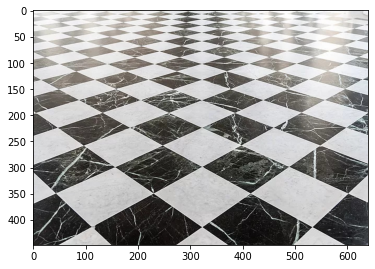

Image shape: 
(448, 640, 3)


In [ ]:
img = pathFolder + "/ex2_distorted_tiles_chessboard.jpg"
image = np.array(Image.open(img))
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.show()

print("Image shape: ")
print(image.shape)

I consider 4 points P1, P2, P3, P4, such that they are on 4 segments, two by two parallel. 


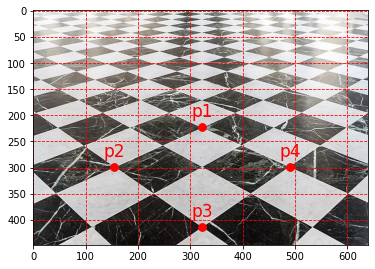

the 4 points chosen, expressed in homogeneous coordinates, are: 


<IPython.core.display.Math object>

In [ ]:
print("I consider 4 points P1, P2, P3, P4, such that they are on 4 segments, two by two parallel. ")

P1 = [323, 222]
P2 = [154, 298]
P3 = [322, 413]
P4 = [490, 298]

plt.figure(figsize=(6,6))
plt.grid(color='r', linestyle='--')

plt.scatter(P1[0], P1[1], marker='o', s=60, color='red')
plt.text(P1[0]-20, P1[1]-20, 'p1', fontsize=17, color='red')

plt.scatter(P2[0], P2[1], marker='o', s=60, color='red')
plt.text(P2[0]-20, P2[1]-20, 'p2', fontsize=17, color='red')

plt.scatter(P3[0], P3[1], marker='o', s=60, color='red')
plt.text(P3[0]-20, P3[1]-20, 'p3', fontsize=17, color='red')

plt.scatter(P4[0], P4[1], marker='o', s=60, color='red')
plt.text(P4[0]-20, P4[1]-20, 'p4', fontsize=17, color='red')

plt.imshow(image)
plt.show()

p1 = Matrix(3, 1, [P1[0], P1[1], 1])
p2 = Matrix(3, 1, [P2[0], P2[1], 1])
p3 = Matrix(3, 1, [P3[0], P3[1], 1])
p4 = Matrix(3, 1, [P4[0], P4[1], 1])

print("the 4 points chosen, expressed in homogeneous coordinates, are: ")
display(Math("p1 = " + latex(p1) + ", p2 = " + latex(p2) + ", p3 = " + latex(p3) + ", p4 = " + latex(p4)))

In [ ]:
print("\n")
print("We compute the 4 lines obtained by intersecting the four points, two by two")
print("\n")

line1_ = p1.cross(p2)
line1 = line1_/line1_[2]
line2_ = p2.cross(p3)
line2 = line2_/line2_[2]
line3_ = p3.cross(p4)
line3 = line3_/line3_[2]
line4_ = p4.cross(p1)
line4 = line4_/line4_[2]

display(Math("line1 = " + latex(line1) + ", line2 = " + latex(line2) + ", line3 = " + latex(line3) + ", line4 = " + latex(line4)))



We compute the 4 lines obtained by intersecting the four points, two by two




<IPython.core.display.Math object>

In [ ]:
print("Now I compute the Vanishing points: the points where the lines computed above meet 'at infinity'")
print("We obtain 2 vanishing points:")
print("V1 is given by the intersection of line1 and line3;")
print("V2 is given by the intersection of line2 and line4.")

V1_ = line1.cross(line3)
V1 = V1_/V1_[2]
V2_ = line2.cross(line4)
V2 = V2_/V2_[2]

print("\n")
display(Math("VanishingPoint1 = " + latex(V1) + ", VanishingPoint2 = " + latex(V2)))

print("\n")
print("Then we compute the Vanishing line, the line at infinity that passes through the two vanishing points just computed:   ")
van_line_ = V1.cross(V2)
van_line = van_line_/van_line_[2]
display(Math("VanishingLine = " + latex(van_line)))

Now I compute the Vanishing points: the points where the lines computed above meet 'at infinity'
We obtain 2 vanishing points:
V1 is given by the intersection of line1 and line3;
V2 is given by the intersection of line2 and line4.




<IPython.core.display.Math object>



Then we compute the Vanishing line, the line at infinity that passes through the two vanishing points just computed:   


<IPython.core.display.Math object>

In [ ]:
print("Vanishing point 1: ")
print("(", float(V1[0]), ",", float(V1[1]), ",", float(V1[2]), ")")
print("Vanishing point 2: ")
print("(", float(V2[0]), ",", float(V2[1]), ",", float(V2[2]), ")")
print("Vanishing line: ")
print("(", float(van_line[0]), ",", float(van_line[1]), ",", float(van_line[2]), ")")

Vanishing point 1: 
( 1133.4750262486875 , -142.47397630118493 , 1.0 )
Vanishing point 2: 
( -512.4669877272021 , -158.2125213608824 , 1.0 )
Vanishing line: 
( -6.236961447408525e-05 , 0.0065226339835728776 , 1.0 )


In [ ]:
print("Now I define the following homography H = H_A * H_P: ")
print("\n")
print("where H_P maps the  vanishing line at infinity, and so the last row of this matrix presents the coordinates of the vanishing lines: ")
HP = Matrix(3, 3, [1, 0, 0, 0, 1, 0, float(van_line[0]), float(van_line[1]), van_line[2]])
display(Math("H_P = " + latex(HP)))

print("\n")
print("H_A as an affine transformation:")
HA = Matrix(3, 3, [2, 0, 0, 0, 2, 0, 0, 0, 1])
display(Math("H_A = " + latex(HA)))

print("\n")
H = HA * HP
display(Math("H = H_A H_P = " + latex(HA) + latex(HP) +" = " + latex(H)))
print("The last row of H is the vanishing line, as I wanted.")

print("\n")
print("\n")
print("I have to verify that: muultiplying the inverse transposed of H for the transposed of the vanishing line results in a line at infinity (0, 0, 1)^T.")
mul = ((H.T)**-1) * van_line
display(Math("H^{-T} l^T = " + latex(mul)))

Now I define the following homography H = H_A * H_P: 


where H_P maps the  vanishing line at infinity, and so the last row of this matrix presents the coordinates of the vanishing lines: 


<IPython.core.display.Math object>



H_A as an affine transformation:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

The last row of H is the vanishing line, as I wanted.




I have to verify that: muultiplying the inverse transposed of H for the transposed of the vanishing line results in a line at infinity (0, 0, 1)^T.


<IPython.core.display.Math object>

In order to recover the parallel lines on the image, I applied the Skimage.transform.warp.
The parameters passed to the function warp are: - the input image (the one above);  - the inverse of H$_P$, inverse coordinate map, that transforms coordinates in the output images into their corresponding coordinates in the input image.

Results obtained using the warp function.

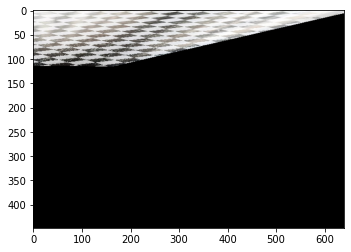

In [ ]:
H_np = np.array(HP).astype(np.float64)
warped = warp(image, np.linalg.inv(H_np))
plt.imshow(warped)
plt.show()

I show only the upper part of the obtained image, as the rest is completely black.

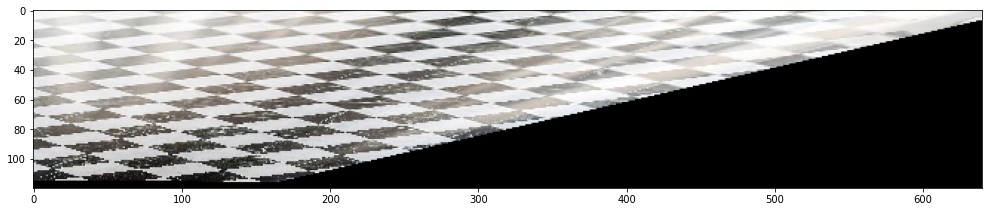

In [ ]:
plt.figure(figsize=(17,17))
plt.imshow(warped[0:120])
plt.show()

Now I use the transformation computed before and exploit the given implementation of the DLT algorithm (adapted in the case of lines).

In [ ]:
def image_rebound(mm,nn,hh):
    W = np.array([[1, nn, nn, 1 ],[1, 1, mm, mm],[ 1, 1, 1, 1]])
    ws = np.dot(hh,W)
    ### scaling
    xx = np.vstack((ws[2,:],ws[2,:],ws[2,:]))
    wsX =  np.round(ws/xx)
    bounds = [np.min(wsX[1,:]), np.max(wsX[1,:]),np.min(wsX[0,:]), np.max(wsX[0,:])]
    return bounds


def make_transform(imm,hh):   
    mm,nn = imm.shape[0],imm.shape[0]
    bounds = image_rebound(mm,nn,hh)
    nrows = bounds[1] - bounds[0]
    ncols = bounds[3] - bounds[2]
    s = max(nn,mm)/max(nrows,ncols)
    scale = np.array([[s, 0, 0],[0, s, 0], [0, 0, 1]])
    trasf = scale@hh
    trasf_prec =  np.linalg.inv(trasf)
    bounds = image_rebound(mm,nn,trasf)
    nrows = (bounds[1] - bounds[0]).astype(np.int)
    ncols = (bounds[3] - bounds[2]).astype(np.int)
    return bounds, nrows, ncols, trasf, trasf_prec


def get_new_image(nrows,ncols,imm,bounds,trasf_prec,nsamples):
    xx  = np.linspace(1, ncols, ncols)
    yy  = np.linspace(1, nrows, nrows)
    [xi,yi] = np.meshgrid(xx,yy) 
    a0 = np.reshape(xi, -1,order ='F')+bounds[2]
    a1 = np.reshape(yi,-1, order ='F')+bounds[0]
    a2 = np.ones((ncols*nrows))
    uv = np.vstack((a0.T,a1.T,a2.T)) 
    new_trasf = np.dot(trasf_prec,uv)
    val_normalization = np.vstack((new_trasf[2,:],new_trasf[2,:],new_trasf[2,:]))
   
    ### The new transformation
    newT = new_trasf/val_normalization
    
    ### 
    xi = np.reshape(newT[0,:],(nrows,ncols),order ='F') 
    yi = np.reshape(newT[1,:],(nrows,ncols),order ='F')
    cols = imm.shape[1]
    rows = imm.shape[0]
    xxq  = np.linspace(1, rows, rows).astype(np.int)
    yyq  = np.linspace(1, cols, cols).astype(np.int)
    [x,y] = np.meshgrid(yyq,xxq) 
    x = (x - 1).astype(np.int) #Offset x and y relative to region origin.
    y = (y - 1).astype(np.int) 
        
    ix = np.random.randint(image.shape[1], size=nsamples)
    iy = np.random.randint(image.shape[0], size=nsamples)
    samples = image[iy,ix]
       
    int_im = griddata((iy,ix), samples, (yi,xi))
    
    #Plotting
    plt.figure(figsize=(17,17))
    plt.imshow(int_im.astype(np.uint8))
    plt.show()

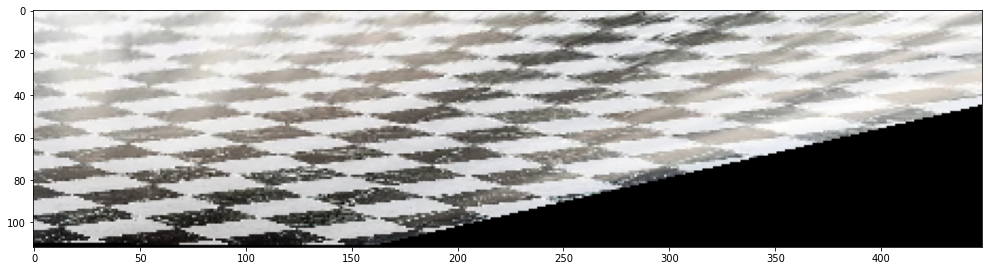

In [ ]:
bounds, nrows, ncols, trasf, trasf_prec = make_transform(image,H_np)     
n,m  = image.shape[0],image.shape[0]
if max(n,m)>1000:
    k =6
else: k =5
num_samples = 10**k

get_new_image(nrows, ncols, image, bounds, trasf_prec, num_samples)

A metric rectification would allow metric properties, such as angles and length ratios, to be measured on the world plane from a perspective image. 

What we have done above allowed us to recover the parallel lines in the input image, therefore to produce an affinely rectified image and recover projective distorsions. So in this case, after warping, we didn't obtain a metric rectification, as the image is dilated more in one direction than the other: the proportions are not mantained, the length ratios are not measurable and the angles are affinely distorted. 

Therefore in order to recover the metric properties from the image, we can apply an approach analogous to the one applied here, but performing also a similarity transformation, in order to infer angles from the image. Now, it is possible to reconstruct the metric structure of the reconstructed image.


#EXERCISE 3# 

###POINT 1###
 Show that the ratio of length of parallel line segments is preserved.

We work on a xy cartesian plane. The four generic points that are defined below are in homogeneous coordinates (being points the third coordinate is '1')

In [ ]:
a, b, c, d, e = symbols('a b c d e')

#points on segment1
x1 = Matrix(3, 1, [a, b, 1])
x2 = Matrix(3, 1, [c, d, 1])
#points on segment2
y1 = Matrix(3, 1, [a+e, b+e, 1])
y2 = Matrix(3, 1, [c+e, d+e, 1])

print("initial points:")
display(Math("x1 = " + latex(x1) + ", x2 = " + latex(x2) + ", y1 = " + latex(y1) + ", y2 = " + latex(y2) + ", "))

print("\n")
print("line1 is the line passing through x1 and x2; line2 is the line passing through y1 and y2:")
line1 = x1.cross(x2)
line2 = y1.cross(y2)
display(Math("line1 = " + latex(line1) + ", line2 = " + latex(line2)))

print("\nWe verify that the two lines are parallel by computing their cross product: ")
display(Math(latex(simplify(line1.cross(line2)))))
print("They are parallel as the third component of their cross product is zero.")

initial points:


<IPython.core.display.Math object>



line1 is the line passing through x1 and x2; line2 is the line passing through y1 and y2:


<IPython.core.display.Math object>


We verify that the two lines are parallel by computing their cross product: 


<IPython.core.display.Math object>

They are parallel as the third component of their cross product is zero.


In [ ]:
seg1 = Segment(x1, x2)
seg2 = Segment(y1, y2)
D1 = seg1.length
D2 = seg2.length
print("lengths of the initial segments: ")
display(Math("segment 1 = " + latex(D1)))
display(Math("segment 2 = " + latex(D2)))

print("Ratio between the lenghts before transformation: ")
display(Math(latex(D1) + "/" + latex(D2)))

print("\n")
s = Symbol('s')
a1, a2, a3, a4, t1, t2 = symbols('a1, a2, a3, a4, t1, t2')
H = Matrix(3, 3,[s, 0, 0, 0, s, 0, 0, 0, 1])
print("Affine transformation matrix (I took a simple case): ")
display(Math("H = " + latex(H)))

print("\n")
x1A = H*x1
x2A = H*x2
y1A = H*y1
y2A = H*y2
print("point after affine transformation: ")
display(Math("x1' = " + latex(x1A) + ", x2' = " + latex(x2A) + ", y1' = " + latex(y1A) + ", y2' = " + latex(y2A) + ", "))

print("\n")
print("line1' is the line passing through x1' and x2'; line2' is the line passing through y1' and y2':")
line1A = x1A.cross(x2A)
line2A = y1A.cross(y2A)
display(Math("line1' = " + latex(line1A) + ", line2' = " + latex(line2A)))

print("\nWe verify that the two lines are parallel by computing their cross product: ")
display(Math(latex(simplify(line1A.cross(line2A)))))
print("They are parallel as the third component of their cross product is zero.")


print("\n")
seg1A = Segment(x1A, x2A)
seg2A = Segment(y1A, y2A)
D1A = simplify(seg1A.length)
D2A = simplify(seg2A.length)
print("lengths of the segments after affine transformation: ")
display(Math("segment 1' = " + latex(D1A)))
display(Math("segment 2' = " + latex(D2A)))

print("\n")
print("Ratio between the lenghts after transformation: ")
display(Math(latex(D1A) + "/" + latex(D2A)))
print("Since s^2 can be simplified, the ratio of segment lengths before and after transformation are equivalent.")

lengths of the initial segments: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ratio between the lenghts before transformation: 


<IPython.core.display.Math object>



Affine transformation matrix (I took a simple case): 


<IPython.core.display.Math object>



point after affine transformation: 


<IPython.core.display.Math object>



line1' is the line passing through x1' and x2'; line2' is the line passing through y1' and y2':


<IPython.core.display.Math object>


We verify that the two lines are parallel by computing their cross product: 


<IPython.core.display.Math object>

They are parallel as the third component of their cross product is zero.


lengths of the segments after affine transformation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>



Ratio between the lenghts after transformation: 


<IPython.core.display.Math object>

Since s^2 can be simplified, the ratio of segment lengths before and after transformation are equivalent.


###Substituting some values and plotting (point 1)###


a = 1 ; b = 1;  c = 2; d = 3; e = 1

Substituting numbers in the previous demonstration: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

They are parallel as the third component of their cross product is zero.




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

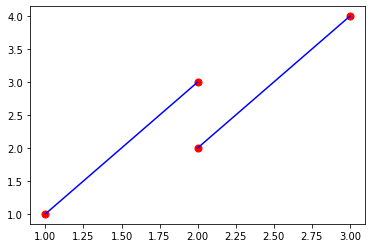

In [ ]:
p1 = x1.subs(a, 1).subs(b, 1)
p2 = x2.subs(c, 2).subs(d, 3)
p3 = y1.subs(a, 1).subs(b, 1).subs(e, 1)
p4 = y2.subs(c, 2).subs(d, 3).subs(e, 1)

print("Substituting numbers in the previous demonstration: ")
display(Math("x1 = " + latex(p1) + ", x2 = " + latex(p2) + ", y1 = " + latex(p3) + ", y2 = " + latex(p4)))

#plotting
plotPoint(p1)
plotPoint(p2)
plotPoint(p3)
plotPoint(p4)
plotSegment(p1, p2)
plotSegment(p3, p4)

print("\n")
line1 = line1.subs(a, 1).subs(b, 1).subs(c, 2).subs(d, 3).subs(e, 1)
line2 = line2.subs(a, 1).subs(b, 1).subs(c, 2).subs(d, 3).subs(e, 1)
display(Math("line1 = " + latex(line1) + ", line2 = " + latex(line2)))

print("\n")
intersect = simplify(line1.cross(line2))
display(Math("line1Intersectline2 :  " + latex(intersect)))
print("They are parallel as the third component of their cross product is zero.")
print("\n")

#length of the two segments and ratio
len_s1 = D1.subs(a, 1).subs(b, 1).subs(c, 2).subs(d, 3).subs(e, 1)
len_s2 = D2.subs(a, 1).subs(b, 1).subs(c, 2).subs(d, 3).subs(e, 1)
ratio_before_transf = len_s1/len_s2
display(Math("lenSegment1 = " + latex(len_s1)))
display(Math("lenSegment2 = " + latex(len_s2)))
display(Math("Ratio = " + latex(ratio_before_transf)))

In the simbolical representation I used a simpler matrix H. Here (numerically is easier) I took into account a more generical affine matrix H

<IPython.core.display.Math object>

point after affine transformation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

They are parallel as the third component of their cross product is zero.




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

So the ratio of length of parallel line segments is preserved after the application of an affine transformation


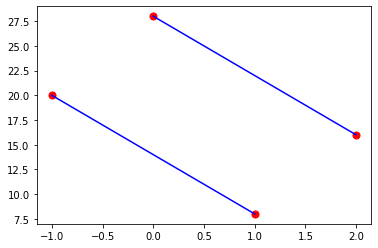

In [ ]:
#H = H.subs(s, 2)
H = Matrix(3, 3,[4, -3, 0, 4, 4, 0, 0, 0, 1])
display(Math("H = " + latex(H)))

#Since the H matrix considered is different, I can't simply sobstitute the symbols, but I have to recompute
p1A = H*p1
p2A = H*p2
p3A = H*p3
p4A = H*p4
print("point after affine transformation: ")
display(Math("x1' = " + latex(p1A) + ", x2' = " + latex(p2A) + ", y1' = " + latex(p3A) + ", y2' = " + latex(p4A)))

#plotting
plotPoint(p1A)
plotPoint(p2A)
plotPoint(p3A)
plotPoint(p4A)
plotSegment(p1A, p2A)
plotSegment(p3A, p4A)

print("\n")
line1A = p1A.cross(p2A)
line2A = p3A.cross(p4A)
display(Math("line1' = " + latex(line1A) + ", line2' = " + latex(line2A)))

print("\n")
intersectA = simplify(line1A.cross(line2A))
display(Math("line1'Intersectline2' :  " + latex(intersectA)))
print("They are parallel as the third component of their cross product is zero.")
print("\n")

#length of the two segments and ratio
seg1A = Segment(p1A, p2A)
seg2A = Segment(p3A, p4A)
len_s1A = simplify(seg1A.length)
len_s2A = simplify(seg2A.length)
ratio_before_transfA = len_s1A/len_s2A

display(Math("lenSegment1 = " + latex(len_s1A)))
display(Math("lenSegment2 = " + latex(len_s2A)))
display(Math("Ratio = " + latex(ratio_before_transfA)))

print("So the ratio of length of parallel line segments is preserved after the application of an affine transformation")

###POINT 2###
 Show that a circle can be computed using 3 points plus the two circular points.

The circular points enable an alternative computation. A circle can be computed using the general formula for a conic defined by five points (2.4–p31), where the five points are the three points augmented with the two circular points.

In [ ]:
print("General equation of the circle (for homogeneous coordinates (x, y, w))") 
print("with center in (x_0, y_0, w_0) = (a, b, 1): ")
x, y, w, a, b, c, d, x1, y1, x2, y2, x3, y3, r, A, B, C = symbols('x, y, w, a, b, c, d, x1, y1, x2, y2, x3, y3, r, A, B, C')
circle1 = (x - a*w)**2 + (y - b*w)**2
circle2 = r**2 * w**2
display(Math(latex(circle1) + ' = ' + latex(circle2)))

print("The equation can be rewritten as:")
circle = x**2 + y**2 - 2*a*x*w - 2*b*y*w + (a**2+b**2-r**2)*w**2  
display(Math(latex(circle) + " = 0"))
print("in which I assume -2a=A, -2b=B, a^2+b^2-r^2=C (with r=radius of the circle)")

print("\n")
print("three generic points (where the third component w_i=1 because represented in homogeneous coordinates): ")
p1 = Matrix(3, 1, [x1, y1, 1])  #w1=1 because homogeneous coords of the circle
p2 = Matrix(3, 1, [x2, y2, 1])
p3 = Matrix(3, 1, [x3, y3, 1])
display(Math("p1= " + latex(p1) + ", p2= " + latex(p2) + ", p3= " + latex(p3)))

print("\n")
print("circular points: ")
i = Symbol('i')
cp1 = Matrix(3, 1, [1, i, 0])
cp2 = Matrix(3, 1, [1, -i, 0])
display(Math("circular Point 1 = " + latex(cp1) + ",  circular Point 2 = " + latex(cp2)))
print("where their last coordinate w_i = 0, so they lie on the line at infinity.")


print("\n")
print("By substituting the 5 points defined above in the equation of the circle we obtain the following 5 constraints, expressed through the constraint matrix: ")

# redefining the matrix to substitute 'i's
constraints_matrix = Matrix(5, 5, [x1**2, y1**2, x1, y1, 1,
                                   x2**2, y2**2, x2, y2, 1,
                                   x3**2, y3**2, x3, y3, 1,
                                   1**2, i**2, 0, 0, 0,
                                   1**2, -i**2, 0, 0, 0])

display(Math(latex(constraints_matrix) + '*' + latex(Matrix(5, 1, [1, 1, A, B, C])) + ' = 0'))
print("where i^2 = -1. So it is evident that the last two rows of the constraint matrix are redundant.")
print("In fact every circle passes through the two circular points.") 
print("So I can rewrite the system of equations in a reduced form as:")

constraints_new = Matrix(3, 4, [x1, y1, 1, x1**2+y1**2,
                                x2, y2, 1, x2**2+y2**2,
                                x3, y3, 1, x3**2+y3**2])
constraints_new2 = Matrix(3, 3, [x1, y1, 1,
                                x2, y2, 1, 
                                x3, y3, 1])

knowns = Matrix(3, 1, [-(x1**2+y1**2), -(x2**2+y2**2), -(x3**2+y3**2)])


display(Math(latex(constraints_new2) + '*' + latex(Matrix(3, 1, [A, B, C])) + " = "+ latex(knowns)))
print("by solving this system of equations I obtain the following values for the parameters A, B, C (which allow to define the circle):")
solve_linear_system_LU(constraints_new, [A, B, C])


General equation of the circle (for homogeneous coordinates (x, y, w))
with center in (x_0, y_0, w_0) = (a, b, 1): 


<IPython.core.display.Math object>

The equation can be rewritten as:


<IPython.core.display.Math object>

in which I assume -2a=A, -2b=B, a^2+b^2-r^2=C (with r=radius of the circle)


three generic points (where the third component w_i=1 because represented in homogeneous coordinates): 


<IPython.core.display.Math object>



circular points: 


<IPython.core.display.Math object>

where their last coordinate w_i = 0, so they lie on the line at infinity.


By substituting the 5 points defined above in the equation of the circle we obtain the following 5 constraints, expressed through the constraint matrix: 


<IPython.core.display.Math object>

where i^2 = -1. So it is evident that the last two rows of the constraint matrix are redundant.
In fact every circle passes through the two circular points.
So I can rewrite the system of equations in a reduced form as:


<IPython.core.display.Math object>

by solving this system of equations I obtain the following values for the parameters A, B, C (which allow to define the circle):


{A: (x1**2 + y1**2 - y1*(x2**2 + y2**2 - (1 - x2/x1)*(x3**2 + y3**2 - (y3 - x3*y1/x1)*(x2**2 + y2**2 - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1) - x3*(x1**2 + y1**2)/x1)/(-(1 - x2/x1)*(y3 - x3*y1/x1)/(y2 - x2*y1/x1) + 1 - x3/x1) - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1) - (x3**2 + y3**2 - (y3 - x3*y1/x1)*(x2**2 + y2**2 - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1) - x3*(x1**2 + y1**2)/x1)/(-(1 - x2/x1)*(y3 - x3*y1/x1)/(y2 - x2*y1/x1) + 1 - x3/x1))/x1,
 B: (x2**2 + y2**2 - (1 - x2/x1)*(x3**2 + y3**2 - (y3 - x3*y1/x1)*(x2**2 + y2**2 - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1) - x3*(x1**2 + y1**2)/x1)/(-(1 - x2/x1)*(y3 - x3*y1/x1)/(y2 - x2*y1/x1) + 1 - x3/x1) - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1),
 C: (x3**2 + y3**2 - (y3 - x3*y1/x1)*(x2**2 + y2**2 - x2*(x1**2 + y1**2)/x1)/(y2 - x2*y1/x1) - x3*(x1**2 + y1**2)/x1)/(-(1 - x2/x1)*(y3 - x3*y1/x1)/(y2 - x2*y1/x1) + 1 - x3/x1)}

###Substituting real numbers and plotting (point 2)###

In [ ]:
p1 = p1.subs(x1, 0).subs(y1, 0)
p2 = p2.subs(x2, 6).subs(y2, 4)
p3 = p3.subs(x3, 4).subs(y3, -4)
x1 = p1[0]; y1 = p1[1]
x2 = p2[0]; y2 = p2[1]
x3 = p3[0]; y3 = p3[1]

constr = np.array([
  [x1, y1, 1],
  [x2, y2, 1],
  [x3, y3, 1]
], dtype=float)

know = np.array([
  -(x1*x1 + y1*y1),
  -(x2*x2 + y2*y2),
  -(x3*x3 + y3*y3)
], dtype=float)

A, B, C = np.linalg.solve(constr,know)

print("A:",A)
print("B:",B)
print("C:",C)

print("\n")
print("Now that I have A, B, C, I can compute the radius and the center of the circle, through:")
center = (-A/2, -B/2)
radius = root((-A/2)**2+(-B/2)**2-C, 2)
display(Math("center = (-A/2, -B/2) = " + latex(center)))
display(Math("radius = squareRoot((-A/2)**2+(-B/2)**2-C) = " + latex(radius)))

A: -9.999999999999998
B: 1.9999999999999984
C: 0.0


Now that I have A, B, C, I can compute the radius and the center of the circle, through:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

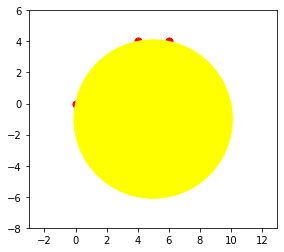

In [ ]:
circ = plt.Circle(center, radius, color='yellow')

figure, axis = plt.subplots()

plt.xlim(-3,13)
plt.ylim(-8, 6)
axis.set_aspect(1)

axis.add_artist(circ)
plotPoint(p1)
plotPoint(p2)
plotPoint(p3)

#EXERCISE 4#

Implement the Example 8.18, pag 229 in Hartley and Zisserman.

I take into account the image of 3 squares placed on three different planes (the planes aren't parallel or orthogonal).

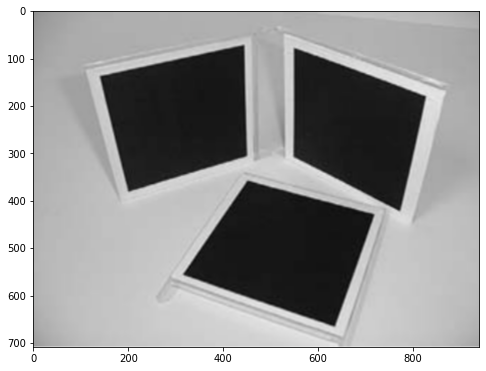

Image shape: 
(708, 941, 4)


In [ ]:
img = pathFolder + "/3squares.png"
image = np.array(Image.open(img))
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

print("Image shape: ")
print(image.shape)

###POINT 1###


Now I have to take into account each square. For each, I compute the homography H that maps the corner points ((0,0)$^T$, (1,0)$^T$, (0,1)$^T$, (1,1)$^T$) to the imaged points. 

In [ ]:
print("I define the points of the 4 corners of a unitary square: \n")

P1_square = [0, 0]
P2_square = [1, 0]
P3_square = [0, 1]
P4_square = [1, 1]

p1_square = Matrix(3, 1, [P1_square[0], P1_square[1], 1])
p2_square = Matrix(3, 1, [P2_square[0], P2_square[1], 1])
p3_square = Matrix(3, 1, [P3_square[0], P3_square[1], 1])
p4_square = Matrix(3, 1, [P4_square[0], P4_square[1], 1])

display(Math("p1Square = " + latex(p1_square) + ", p2Square = " + latex(p2_square) + ", p3Square = " + latex(p3_square) + ", p4Square = " + latex(p4_square)))

I define the points of the 4 corners of a unitary square: 



<IPython.core.display.Math object>

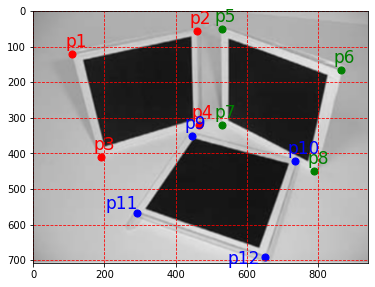



I manually found the coordinates of the corners of the 3 squares in the image. 
 The 12 points chosen, expressed in homogeneous coordinates, are: 




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>



These 3 squares aren't on parallel planes, but they are on planes that have to be orthogonal


In [ ]:
P1 = [110, 120]
P3 = [190, 410]
P4 = [465, 320]
P2 = [460, 55]
P5 = [530, 50]
P7 = [530, 320]
P8 = [790, 450]
P6 = [865, 165]
P11 = [292, 567] #p9
P9 = [445, 350] #p10
P10 = [735, 420] #p11
P12 = [650, 690] #p12

plt.figure(figsize=(6,6))
plt.grid(color='r', linestyle='--')

plt.scatter(P1[0], P1[1], marker='o', s=50, color='red')
plt.text(P1[0]-20, P1[1]-20, 'p1', fontsize=17, color='red')
plt.scatter(P2[0], P2[1], marker='o', s=50, color='red')
plt.text(P2[0]-20, P2[1]-20, 'p2', fontsize=17, color='red')
plt.scatter(P3[0], P3[1], marker='o', s=50, color='red')
plt.text(P3[0]-20, P3[1]-20, 'p3', fontsize=17, color='red')
plt.scatter(P4[0], P4[1], marker='o', s=50, color='red')
plt.text(P4[0]-20, P4[1]-20, 'p4', fontsize=17, color='red')

plt.scatter(P5[0], P5[1], marker='o', s=50, color='green')
plt.text(P5[0]-20, P5[1]-20, 'p5', fontsize=17, color='green')
plt.scatter(P6[0], P6[1], marker='o', s=50, color='green')
plt.text(P6[0]-20, P6[1]-20, 'p6', fontsize=17, color='green')
plt.scatter(P7[0], P7[1], marker='o', s=50, color='green')
plt.text(P7[0]-20, P7[1]-20, 'p7', fontsize=17, color='green')
plt.scatter(P8[0], P8[1], marker='o', s=50, color='green')
plt.text(P8[0]-20, P8[1]-20, 'p8', fontsize=17, color='green')

plt.scatter(P9[0], P9[1], marker='o', s=50, color='blue')
plt.text(P9[0]-20, P9[1]-20, 'p9', fontsize=17, color='blue')
plt.scatter(P10[0], P10[1], marker='o', s=50, color='blue')
plt.text(P10[0]-20, P10[1]-20, 'p10', fontsize=17, color='blue')
plt.scatter(P11[0], P11[1], marker='o', s=50, color='blue')
plt.text(P11[0]-90, P11[1]-10, 'p11', fontsize=17, color='blue')
plt.scatter(P12[0], P12[1], marker='o', s=50, color='blue')
plt.text(P12[0]-105, P12[1]+20, 'p12', fontsize=17, color='blue')


plt.imshow(image)
plt.show()

p1 = Matrix(3, 1, [P1[0], P1[1], 1])
p2 = Matrix(3, 1, [P2[0], P2[1], 1])
p3 = Matrix(3, 1, [P3[0], P3[1], 1])
p4 = Matrix(3, 1, [P4[0], P4[1], 1])
p5 = Matrix(3, 1, [P5[0], P5[1], 1])
p6 = Matrix(3, 1, [P6[0], P6[1], 1])
p7 = Matrix(3, 1, [P7[0], P7[1], 1])
p8 = Matrix(3, 1, [P8[0], P8[1], 1])
p9 = Matrix(3, 1, [P9[0], P9[1], 1])
p10 = Matrix(3, 1, [P10[0], P10[1], 1])
p11 = Matrix(3, 1, [P11[0], P11[1], 1])
p12 = Matrix(3, 1, [P12[0], P12[1], 1])

print("\n")
print("I manually found the coordinates of the corners of the 3 squares in the image. \n The 12 points chosen, expressed in homogeneous coordinates, are: ")
print("\n")
display(Math("p1 = " + latex(p1) + ", p2 = " + latex(p2) + ", p3 = " + latex(p3) + ", p4 = " + latex(p4)))
print("\n")
display(Math("p5 = " + latex(p5) + ", p6 = " + latex(p6) + ", p7 = " + latex(p7) + ", p8 = " + latex(p8)))
print("\n")
display(Math("p9 = " + latex(p9) + ", p10 = " + latex(p10) + ", p11 = " + latex(p11) + ", p12 = " + latex(p12)))
print("\n")
print("These 3 squares aren't on parallel planes, but they are on planes that have to be orthogonal")

From now on, I'll refer to these squares as the red one, the green and the blue one, referring to the color in which I plotted the corners.
Therefore, for example, in the following: with $H_r$ I'll refer to the homography that maps p1, p2, p3, p4 in the unitary square; $H_g$ refers to p5, p6, p7, p8; $H_b$ refers to p9, p10, p11, p12.

Now I have to map the 4 points of each of the 3 squares into the unitary square. So I compute three homographies $H_r$, $H_g$, $H_b$. To do so, I apply the DLT algorithm.

In [ ]:
#function that computes the A_i matrix of a point, taking as input the 
def computeAi(M, N):
  Ai = zeros(3, 9)   #initialization  #3 rows, 9 cols
  Ai[0, 3:6] = (-M[2]*N).T
  Ai[0, 6:9] = (M[1]*N).T
  Ai[1, 6:9] = (-M[0]*N).T
  Ai[1, 0:3] = -Ai[0, 3:6]
  Ai[2, 0:3] = -Ai[0, 6:9]
  Ai[2, 3:6] = -Ai[1, 6:9]
  return Ai

square = [p1_square, p2_square, p3_square, p4_square] #unitary square
red = [p1, p2, p3, p4]
green = [p5, p6, p7, p8]
blue = [p9, p10, p11, p12]

#red square
A1r = computeAi(red[0], square[0])
A2r = computeAi(red[1], square[1])
A3r = computeAi(red[2], square[2])
A4r = computeAi(red[3], square[3])
#green
A1g = computeAi(green[0], square[0])
A2g = computeAi(green[1], square[1])
A3g = computeAi(green[2], square[2])
A4g = computeAi(green[3], square[3])
#blue
A1b = computeAi(blue[0], square[0])
A2b = computeAi(blue[1], square[1])
A3b = computeAi(blue[2], square[2])
A4b = computeAi(blue[3], square[3])


print("For each square, I compute for its vertex the A_i matrices:\n")

print("\nAi matrices for Red square:")
display(Math('A_{1r}='+latex(A1r)))
display(Math('A_{2r}='+latex(A2r)))
display(Math('A_{3r}='+latex(A3r)))
display(Math('A_{4r}='+latex(A4r)))

print("\nAi matrices for Green square:")
display(Math('A_{1g}='+latex(A1g)))
display(Math('A_{2g}='+latex(A2g)))
display(Math('A_{3g}='+latex(A3g)))
display(Math('A_{4g}='+latex(A4g)))

print("\nAi matrices for Blue square:")
display(Math('A_{1b}='+latex(A1b)))
display(Math('A_{2b}='+latex(A2b)))
display(Math('A_{3b}='+latex(A3b)))
display(Math('A_{4b}='+latex(A4b)))


For each square, I compute for its vertex the A_i matrices:


Ai matrices for Red square:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Ai matrices for Green square:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Ai matrices for Blue square:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def aggregateAi(A1, A2, A3, A4):
  A = zeros(12, 9)
  A[0:3,0:] = A1
  A[3:6,0:] = A2
  A[6:9,0:] = A3
  A[9:12,0:] = A4
  return A


print("Now I aggregate the 4 matrices of each square in a single matrix, obtaining 3 matrices 12x12")

#red square
Ar = aggregateAi(A1r, A2r, A3r, A4r)
#green square 
Ag = aggregateAi(A1g, A2g, A3g, A4g)
#blue square
Ab = aggregateAi(A1b, A2b, A3b, A4b)

display(Math('A_r='+latex(Ar)))
print('\n')
display(Math('A_g='+latex(Ag)))
print('\n')
display(Math('A_b='+latex(Ab)))

Now I aggregate the 4 matrices of each square in a single matrix, obtaining 3 matrices 12x12


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def compute_nullspace(A):
  x = A.nullspace()[0]
  return x

print("Now I take A_r, A_g, A_b and I compute its null space. ")
null_r = compute_nullspace(Ar)
null_g = compute_nullspace(Ag)
null_b = compute_nullspace(Ab)

display(Math('A_rnul =' + latex(null_r.evalf(4))))
print("\n")
display(Math('A_gnul =' + latex(null_g.evalf(4))))
print("\n")
display(Math('A_bnul =' + latex(null_b.evalf(4))))

print("The three null spaces computed are 9x1 vectors, the vectorised version of the homography (3x3)")

Now I take A_r, A_g, A_b and I compute its null space. 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The three null spaces computed are 9x1 vectors, the vectorised version of the homography (3x3)


In [ ]:
print("I verify that I computed the null space in the right way, by multiplying the matrix A of each square and its respective null space.")
print("I computed it correctly if, from this multiplication I obtain a 12x1 vector of zeros.")

print("Red:")
display(Math('A_r * A_rnul = ' + latex(Ar*null_r)))

print("Green:")
display(Math('A_g * A_gnul = ' + latex(Ag*null_g)))

print("Blue:")
display(Math('A_b * A_bnul = ' + latex(Ab*null_b)))

I verify that I computed the null space in the right way, by multiplying the matrix A of each square and its respective null space.
I computed it correctly if, from this multiplication I obtain a 12x1 vector of zeros.
Red:


<IPython.core.display.Math object>

Green:


<IPython.core.display.Math object>

Blue:


<IPython.core.display.Math object>

In [ ]:
print("Reshaping, from 9x1 vector to 3x3 homographty.")
print("Here the homographies obtained: ")

def reshape_to_homography(null_i):
  H = zeros(3,3)
  H[:,0] = null_i[0:3]
  H[:,1] = null_i[3:6]
  H[:,2] = null_i[6:9]
  H = H.T
  H = N(H,4)
  return H

Hr = reshape_to_homography(null_r)
Hg = reshape_to_homography(null_g)
Hb = reshape_to_homography(null_b)

display(Math('H_r = ' + latex(Hr)))
print("\n")
display(Math('H_g = ' + latex(Hg)))
print("\n")
display(Math('H_b = ' + latex(Hb)))

Reshaping, from 9x1 vector to 3x3 homographty.
Here the homographies obtained: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print("I multiply the homography matrix computed for the red square for the 4 points of the unit square.")
print("If I obtain as result the 4 corners of the red square, then I'm sure that the homography computed is correct.")
print("I do the same for the green and blue square.")

print("Pay attention to the fact that I have normalized the results.")

x1 = Hr*p1_square
x2 = Hr*p2_square
x3 = Hr*p3_square
x4 = Hr*p4_square
x5 = Hg*p1_square
x6 = Hg*p2_square
x7 = Hg*p3_square
x8 = Hg*p4_square
x9 = Hb*p1_square
x10 = Hb*p2_square
x11 = Hb*p3_square
x12 = Hb*p4_square

print("\nRed square: ")
display(Math('H_r*p1square = ' + latex(x1)+', normalized = ' + latex(x1/x1[2])))
print("\n")
display(Math('H_r*p2square = ' + latex(x2)+', normalized = ' + latex(x2/x2[2])))
print("\n")
display(Math('H_r*p3square = ' + latex(x3)+', normalized = ' + latex(x3/x3[2])))
print("\n")
display(Math('H_r*p4square = ' + latex(x4)+', normalized = ' + latex(x4/x4[2])))

print("\nGreen square: ")
display(Math('H_g*p1square = ' + latex(x5)+', normalized = ' + latex(x5/x5[2])))
print("\n")
display(Math('H_g*p2square = ' + latex(x6)+', normalized = ' + latex(x6/x6[2])))
print("\n")
display(Math('H_g*p3square = ' + latex(x7)+', normalized = ' + latex(x7/x7[2])))
print("\n")
display(Math('H_g*p4square = ' + latex(x8)+', normalized = ' + latex(x8/x8[2])))

print("\nBlue square: ")
display(Math('H_b*p1square = ' + latex(x9)+', normalized = ' + latex(x9/x9[2])))
print("\n")
display(Math('H_b*p2square = ' + latex(x10)+', normalized = ' + latex(x10/x10[2])))
print("\n")
display(Math('H_b*p3square = ' + latex(x11)+', normalized = ' + latex(x11/x11[2])))
print("\n")
display(Math('H_b*p4square = ' + latex(x12)+', normalized = ' + latex(x12/x12[2])))

print("The points obtained above are the same we selected at the beginning from the image.")

I multiply the homography matrix computed for the red square for the 4 points of the unit square.
If I obtain as result the 4 corners of the red square, then I'm sure that the homography computed is correct.
I do the same for the green and blue square.
Pay attention to the fact that I have normalized the results.

Red square: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Green square: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Blue square: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The points obtained above are the same we selected at the beginning from the image.


###POINT 2###

Now I have to compute the imaged circular points for the plane of the square, as $H(1, ±i, 0)^T$.
If H=$[h_1, h_2, h_3]$, then the imaged circular points: $h_1±i*h_2$. From each homogeneous matrix, I compute two imaged circular point.

In [ ]:
c1 = Matrix([1, I, 0])  #simpy.I
c2 = Matrix([1, -I, 0]) #simpy.I

display(Math('Circular points: ' + 'c1 = ' + latex(c1) + ', c2 = ' + latex(c2)))

print("\nThe imaged circular points are obtained by multiplying the Homography matrices for c1 and c2.\n")

display(Math('c1_r = ' + latex(Hr*c1) + ', c2_r = ' + latex(Hr*c2)))
print("\n")
display(Math('c1_g = ' + latex(Hg*c1) + ', c2_g = ' + latex(Hg*c2)))
print("\n")
display(Math('c1_b = ' + latex(Hb*c1) + ', c2_b = ' + latex(Hb*c2)))



<IPython.core.display.Math object>


The imaged circular points are obtained by multiplying the Homography matrices for c1 and c2.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

###POINT 3###

Now I fit a conic to the six imaged circular points.

In [ ]:
def take_col1(H):
  return H[:,0]

def take_col2(H):
  return H[:,1]

def constr1(h1, h2, W):
  m = (h1.T)*W*(h2)
  return m

def constr2(h1, h2, W):
  m = (h1.T)*W*(h1) - (h2.T)*W*(h2)
  return m


print("First I define a generic conic:")
a, b, c, d, e, f = symbols('a, b, c, d, e, f', real = True)
W = Matrix([[a, b/2, d/2],
            [b/2, c, e/2],
            [d/2, e/2, f]])

display(Math(latex(W)))
print("\n")

print("I extract the first and second column of each homography matrix and set the constraints")
h1r = take_col1(Hr)
h2r = take_col2(Hr)
h1b = take_col1(Hb)
h2b = take_col2(Hb)
h1g = take_col1(Hg)
h2g = take_col2(Hg)

m1 = constr1(h1r, h2r, W)
m2 = constr2(h1r, h2r, W)
m3 = constr1(h1b, h2b, W)
m4 = constr2(h1b, h2b, W)
m5 = constr1(h1g, h2g, W)

expression = Matrix([[m1],[m2],[m3],[m4],[m5]])

display(Math(latex(Eq(expression, zeros(6,1), evaluate=False))))

expression = solve(expression)
W=W.subs([(a, expression[a]), (b, expression[b]), (c, expression[c]), (d, expression[d]), (e, expression[e]), (f, 1)]) #I set f=1

print("\nI choosed the parameter f=1, obtaining the following conic omega:\n")
display(Math('\omega = '+latex(W.evalf(4))))

First I define a generic conic:


<IPython.core.display.Math object>



I extract the first and second column of each homography matrix and set the constraints


<IPython.core.display.Math object>


I choosed the parameter f=1, obtaining the following conic omega:



<IPython.core.display.Math object>

###POINT 4###

Finally I compute the calibration K from $\omega = (KK^T)^{−1}$, using the Cholesky factorization.

In [ ]:
W_inverse = W.inv()
W_inverse = W_inverse.evalf(4)
Kal = W_inverse.cholesky()

display(Math(latex('K = ')+latex(Kal)))
print('\n')
print("I have to check that:")
display(Math('\omega = (K*K^T)^{-1}'))
print("\n")
print("I evaluate W and the inverse of k*K^T")
display(Math(latex(Eq(W.evalf(4), ((Kal*Kal.T).inv()).evalf(4), evaluate=False))))
print("Since they are equal, I've done things correctly.")

<IPython.core.display.Math object>



I have to check that:


<IPython.core.display.Math object>



I evaluate W and the inverse of k*K^T


<IPython.core.display.Math object>

Since they are equal, I've done things correctly.
